In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd 
data =pd.read_csv("/kaggle/input/playground-series-s3e8/train.csv")

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')

In [3]:
# Check for missing values
train_df.isnull().sum()

# Basic descriptive statistics for numerical columns
train_df.describe()

# Check for categorical variables and their distributions
train_df['cut'].value_counts()
train_df['color'].value_counts()
train_df['clarity'].value_counts()


clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [4]:
# Impute missing numerical values with the median (for numerical columns only)
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numerical_columns] = train_df[numerical_columns].fillna(train_df[numerical_columns].median())

# Impute missing categorical values with the mode (for categorical columns only)
categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


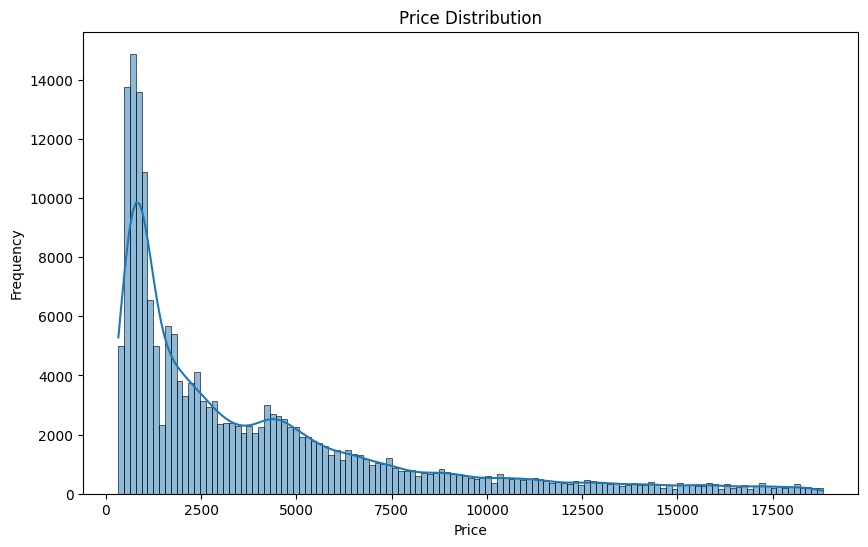

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


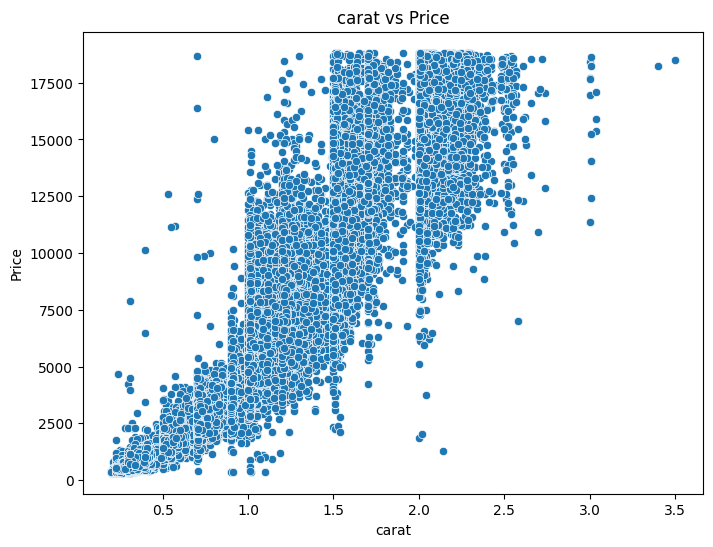

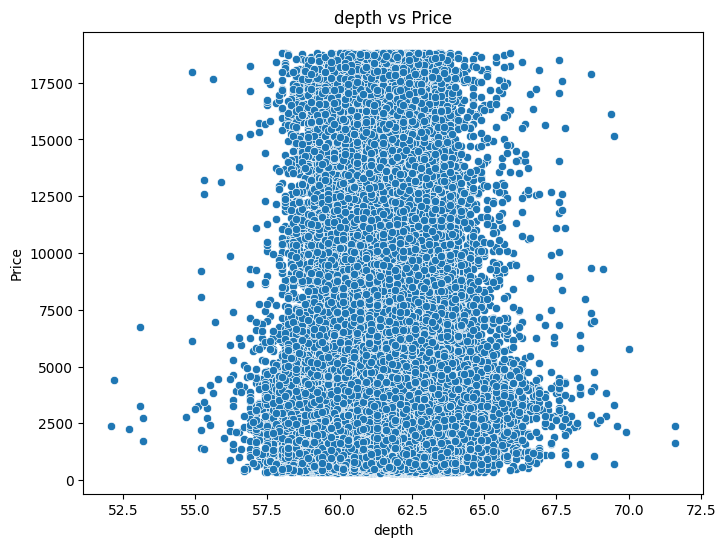

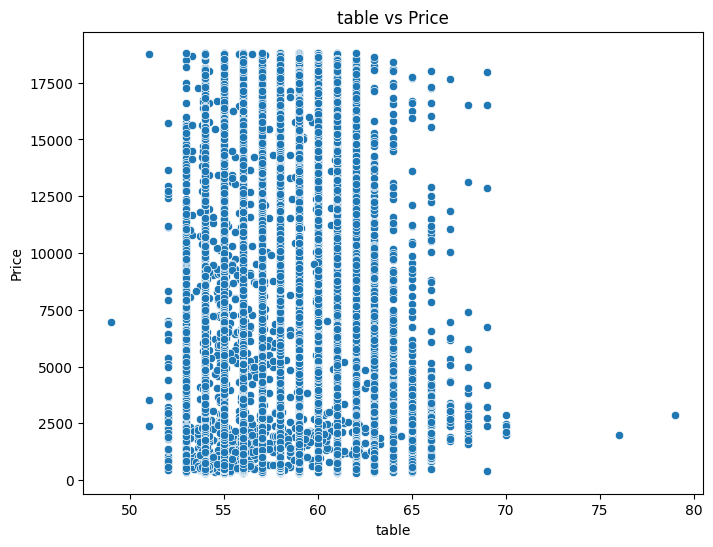

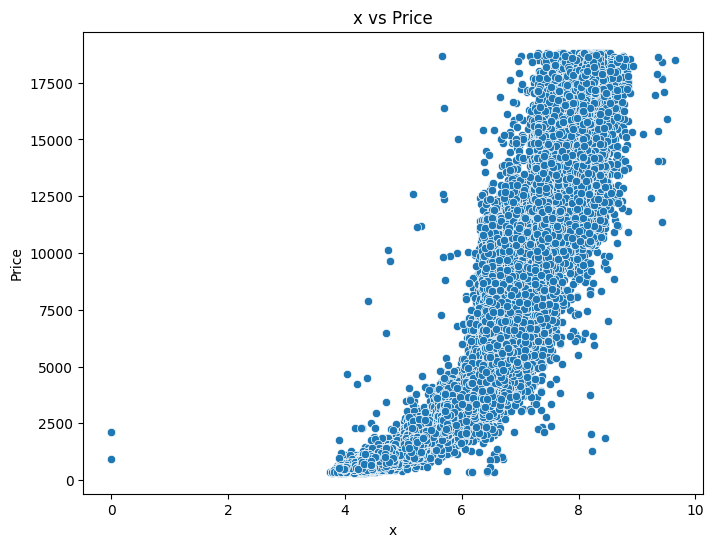

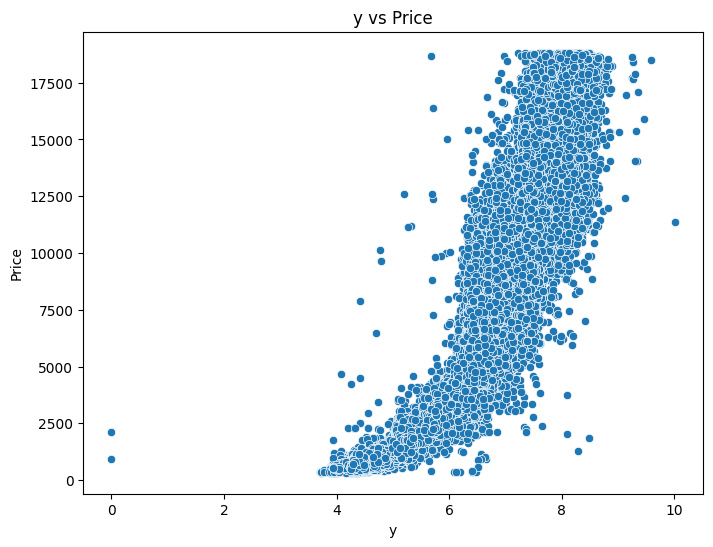

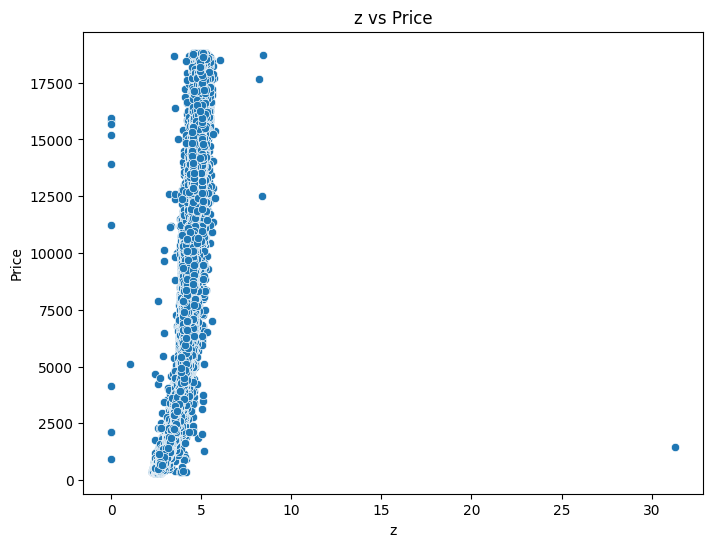

In [6]:
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Scatter plot of numerical features vs price
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train_df[feature], y=train_df['price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features (X) and target (y)
X = train_df.drop(columns=['price'])
y = train_df['price']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)




In [10]:
# One-hot encode the categorical features
X_train_encoded = pd.get_dummies(X_train, columns=['cut', 'color', 'clarity'], drop_first=True)
X_valid_encoded = pd.get_dummies(X_valid, columns=['cut', 'color', 'clarity'], drop_first=True)


In [12]:
# View the first 5 rows of the encoded training set
print(X_train_encoded.head())

# View the first 5 rows of the encoded validation set
print(X_valid_encoded.head())


            id  carat  depth  table     x     y     z  cut_Good  cut_Ideal  \
83475    83475   0.32   61.6   58.0  4.38  4.41  2.71     False      False   
160324  160324   1.20   62.6   57.0  6.81  6.76  4.25     False      False   
101740  101740   1.50   62.2   55.0  7.30  7.26  4.53     False       True   
180341  180341   1.67   61.9   59.0  7.65  7.61  4.71     False      False   
48480    48480   1.00   63.7   60.0  6.34  6.30  4.02      True      False   

        cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
83475          True  ...    False    False    False       False         True   
160324         True  ...    False    False    False       False        False   
101740        False  ...    False     True    False       False        False   
180341         True  ...    False     True    False       False        False   
48480         False  ...     True    False    False       False        False   

        clarity_SI2  clarity_VS1  clarity_VS2  cla

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns (after encoding, we'll have more features)
numerical_columns = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns

# Scale the numerical columns
X_train_scaled = scaler.fit_transform(X_train_encoded[numerical_columns])
X_valid_scaled = scaler.transform(X_valid_encoded[numerical_columns])


In [14]:
# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train_encoded.index)
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns=numerical_columns, index=X_valid_encoded.index)

# Drop the original numerical columns (before scaling) and concatenate the scaled features with the encoded categorical ones
X_train_final = pd.concat([X_train_encoded.drop(columns=numerical_columns), X_train_scaled_df], axis=1)
X_valid_final = pd.concat([X_valid_encoded.drop(columns=numerical_columns), X_valid_scaled_df], axis=1)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_final, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid_final)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_valid, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 388897.80264855485
Root Mean Squared Error: 623.6167113288056
R-squared: 0.9759339100590124


: 